<a href="https://colab.research.google.com/github/dsborges2503/Python_Financas_Investimento_Colab/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_05_Backtesting_com_Pyfolio_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python para Investimentos



Link para o vídeo: https://youtu.be/d2qrsCfXung

**Python para Investimentos** é um conjunto de códigos e vídeos em que mostro como utilizar a linguagem de programação PYTHON através da ferramenta online Google Colab para fazer estudos no mercado financeiro.

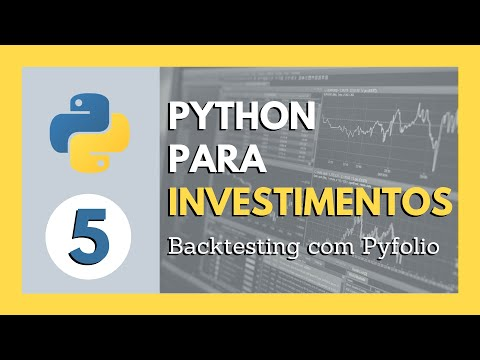

In [ ]:
#@title Vídeo
from IPython.display import YouTubeVideo
YouTubeVideo('d2qrsCfXung', width=854, height=480)

# 1. Importando bibliotecas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

     |████████████████████████████████| 5.5MB 6.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=b4e0ac9270a16a9111b97635f2f4a4ac5b939794c4bbb58ae7759af7dd4f4467
  Stored in directory: /tmp/pip-ephem-wheel-cache-notxg_dg/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-opu59n7d
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-opu59n7d
     |████████████████████████████████| 61kB 3.0MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-cp36-none-any.whl size=75764 sha256=ee41cb1e1e0e74833d0f7e727865278fdda572b7d55a238a7b302e1608cbbac8
  Stored in directory: /tmp/pip-ephem-wheel-cache-0olu3ay4/wheels/62/7d/a7/3e462442ba7d63c35414176627c886340521dc3dbc0893ce9f
  Created wheel for empyrical: filename=empyrical-0.5.5-cp36-none-any.whl size=39763 sha256=9f698c0684e079380b0dd5d7f0b5d1ea4ddcdf0e6b0c8664e2c884a19012f6ec
  Stored in directory: /root/.cache/pip/wheels/ea/b2/c8/6769d8444d2f2e608fae2641833110668d0ffd1abeb2e9f3fc
Successfully built pyfolio empyrical


In [ ]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


# 2. Obtendo e tratando os dados

In [ ]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "MGLU3.SA BBAS3.SA IRBR3.SA SANB3.SA SMLS3.SA WEGE3.SA ^BVSP"

tickers = "CMIG4.SA SANB11.SA BPAC11.SA WEGE3.SA MGLU3.SA BRAP4.SA ^BVSP" #carteira 1
tickers = "BRAP4.SA CSNA3.SA JBSS3.SA MGLU3.SA VALE3.SA WEGE3.SA ^BVSP" #carteira 2
tickers = "B3SA3.SA WEGE3.SA BTOW3.SA MGLU3.SA USIM5.SA RENT3.SA ^BVSP" #carteira 3 alto retorno 2018 2019 e 2020, baixas quedas mensais CARTEIRA FORTE
tickers = "JBSS3.SA WEGE3.SA USIM5.SA RENT3.SA BPAC11.SA MGLU3.SA ^BVSP" # carteira 4 bom retorno em 2020 e 2019 poucas quedas mensais
tickers = "MGLU3.SA BPAN4.SA EGIE3.SA ANIM3.SA TCSA3.SA PRIO3.SA ^BVSP" # carteira 3 anos, ruim valorização só em 2019
tickers = "ITSA4.SA GGBR4.SA MGLU3.SA GNDI3.SA LOGN3.SA TRIS3.SA ^BVSP" #alta valorização mensal e anual 2018 e 2019 poucos prejuizos
tickers = "RENT3.SA PRIO3.SA SEER3.SA LOGN3.SA MGLU3.SA AMAR3.SA ^BVSP" #não teve uma boa valorização em 2019, apenas 50%, varios meses negativo

dados_yahoo = yf.download(tickers=tickers, period="3y")['Adj Close']
retorno = dados_yahoo.pct_change()
retorno


[*********************100%***********************]  7 of 7 completed


In [ ]:
len(dados_yahoo.columns)


7

[*********************100%***********************]  5 of 5 completed


Start date,2017-11-17
End date,2020-11-16
Total months,35
,Backtest
Annual return,89.128%
Cumulative returns,552.97%
Annual volatility,43.369%
Sharpe ratio,1.69
Calmar ratio,2.05
Stability,0.95
Max drawdown,-43.419%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,43.42,2020-02-19,2020-03-18,2020-05-25,69
1,16.29,2018-08-07,2018-09-13,2018-10-08,45
2,15.65,2019-03-19,2019-05-16,2019-06-21,69
3,12.74,2018-06-04,2018-06-07,2018-07-12,29
4,11.10,2020-08-28,2020-09-23,2020-10-13,33


Stress Events,mean,min,max
New Normal,0.29%,-18.15%,18.90%


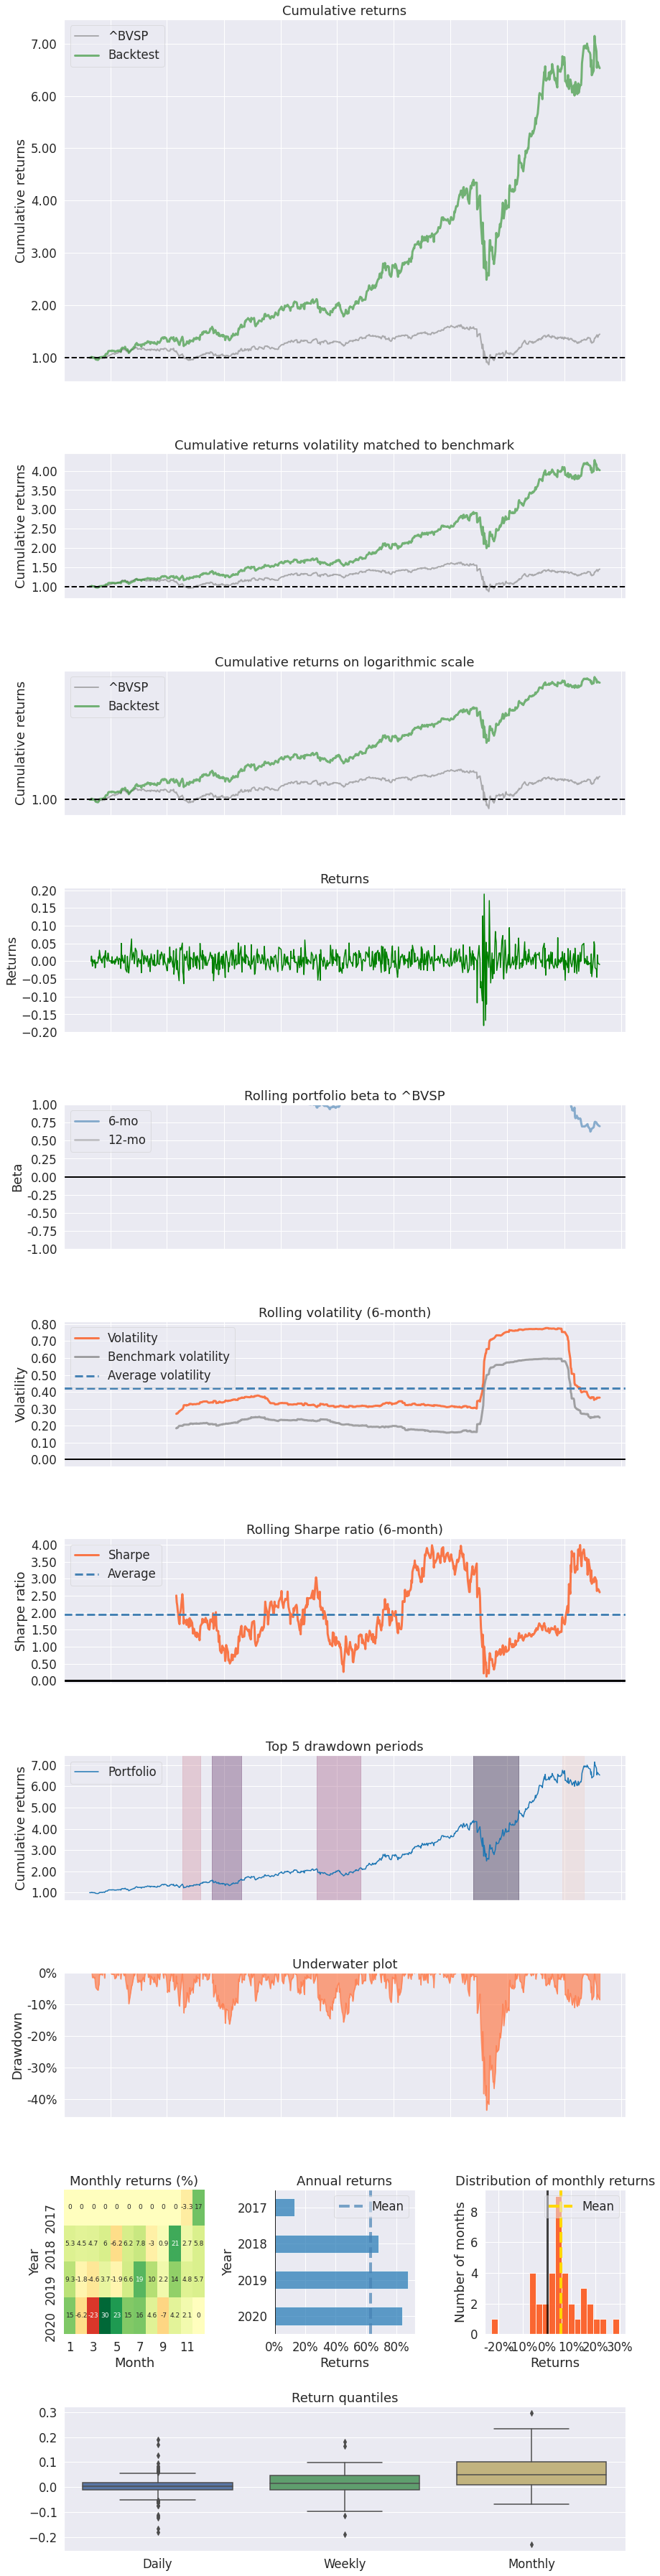

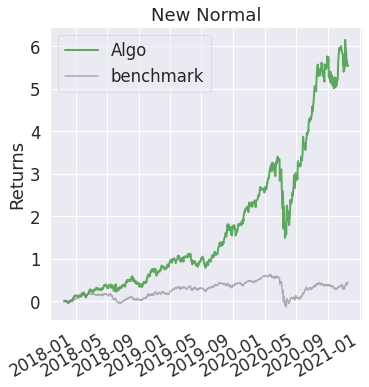

In [ ]:
tickers = "MGLU3.SA BTOW3.SA B3SA3.SA WEGE3.SA ^BVSP" #  USIM5.SA   JBSS3.SA BPAC11.SA RENT3.SA 
dados_yahoo = yf.download(tickers=tickers, period="3y")['Adj Close']
retorno = dados_yahoo.pct_change()
retorno
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado
carteira = 5000 * retorno_acumulado.iloc[:, :len(dados_yahoo.columns)-1]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])




In [ ]:
dados_yahoo

,ANIM3.SA,BPAN4.SA,EGIE3.SA,MGLU3.SA,PRIO3.SA,TCSA3.SA,^BVSP
Date,,,,,,,
2017-11-13,22.651150,1.708247,23.529686,1.454020,5.988000,2.19,72475.0
2017-11-14,22.245960,1.689475,23.276958,1.561499,5.900000,2.11,70827.0
2017-11-15,22.245960,1.689475,23.276958,1.561499,5.900000,2.11,NaN
2017-11-16,22.730213,1.689475,23.912022,1.620638,5.999000,2.10,72512.0
2017-11-17,23.036575,1.773949,23.711128,1.686027,6.058000,2.12,73437.0
...,...,...,...,...,...,...,...
2020-11-09,31.629999,8.500000,43.900002,26.450001,35.240002,8.80,103913.0
2020-11-10,31.469999,8.400000,43.340000,25.219999,34.529999,8.89,105351.0
2020-11-11,30.930000,8.580000,43.290001,25.580000,33.380001,8.65,104532.0


In [ ]:
retorno = dados_yahoo.pct_change()
retorno

,GGBR4.SA,GNDI3.SA,ITSA4.SA,LOGN3.SA,MGLU3.SA,TRIS3.SA,^BVSP
Date,,,,,,,
2017-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-14,-0.046935,NaN,-0.014326,0.002898,0.073918,-0.002278,-0.022739
2017-11-15,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2017-11-16,0.030151,NaN,0.015503,0.008673,0.037873,-0.006849,0.023790
2017-11-17,0.028292,NaN,0.011451,-0.025791,0.040348,0.006897,0.012757
...,...,...,...,...,...,...,...
2020-11-09,-0.017857,-0.009887,0.062118,-0.005525,-0.020370,0.007634,0.030893
2020-11-10,-0.053182,-0.038003,0.032598,0.038194,-0.046503,0.009259,0.013838
2020-11-11,0.004801,-0.006632,-0.015785,0.016722,0.014274,-0.018349,-0.007774


In [ ]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,GGBR4.SA,GNDI3.SA,ITSA4.SA,LOGN3.SA,MGLU3.SA,TRIS3.SA,^BVSP
Date,,,,,,,
2017-11-13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-11-14,0.953065,NaN,0.985674,1.002898,1.073918,0.997722,0.977261
2017-11-15,0.953065,NaN,0.985674,1.002898,1.073918,0.997722,0.977261
2017-11-16,0.981801,NaN,1.000955,1.011596,1.114591,0.990888,1.000511
2017-11-17,1.009579,NaN,1.012417,0.985506,1.159563,0.997722,1.013274
...,...,...,...,...,...,...,...
2020-11-09,2.223674,3.590064,1.321476,4.785881,18.190948,6.083119,1.433777
2020-11-10,2.105415,3.453632,1.364553,4.968676,17.345017,6.139444,1.453618
2020-11-11,2.115522,3.430728,1.343015,5.051764,17.592606,6.026794,1.442318


In [ ]:
carteira = 5000 * retorno_acumulado.iloc[:, :6]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,GGBR4.SA,GNDI3.SA,ITSA4.SA,LOGN3.SA,MGLU3.SA,TRIS3.SA,saldo,retorno
Date,,,,,,,,
2017-11-13,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,30000.000000,NaN
2017-11-14,4765.326255,NaN,4928.369837,5014.490455,5369.591291,4988.611014,25066.388850,-0.164454
2017-11-15,4765.326255,NaN,4928.369837,5014.490455,5369.591291,4988.611014,25066.388850,0.000000
2017-11-16,4909.004865,NaN,5004.776412,5057.978855,5572.955537,4954.442224,25499.157892,0.017265
2017-11-17,5047.892709,NaN,5062.083684,4927.530295,5797.812826,4988.611014,25823.930528,0.012737
...,...,...,...,...,...,...,...,...
2020-11-09,11118.368911,17950.322445,6607.378184,23929.406835,90954.741017,30415.596062,180975.813456,-0.009787
2020-11-10,10527.073799,17268.160917,6822.767401,24843.377576,86725.082792,30697.221070,176883.683554,-0.022611
2020-11-11,10577.612032,17153.637587,6715.072793,25258.818678,87963.032180,30133.971055,177802.144325,0.005192


# 3. Resultados

Start date,2017-11-13
End date,2020-11-13
Total months,35
,Backtest
Annual return,82.51%
Cumulative returns,490.766%
Annual volatility,43.05%
Sharpe ratio,1.62
Calmar ratio,1.54
Stability,0.94
Max drawdown,-53.741%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,53.74,2020-01-20,2020-03-23,2020-07-20,131
1,16.45,2017-11-13,2017-11-14,2018-01-04,39
2,12.29,2020-09-01,2020-09-29,2020-10-21,37
3,9.34,2018-05-16,2018-05-28,2018-06-04,14
4,8.96,2018-06-04,2018-06-08,2018-07-17,32


Stress Events,mean,min,max
New Normal,0.28%,-20.23%,17.41%


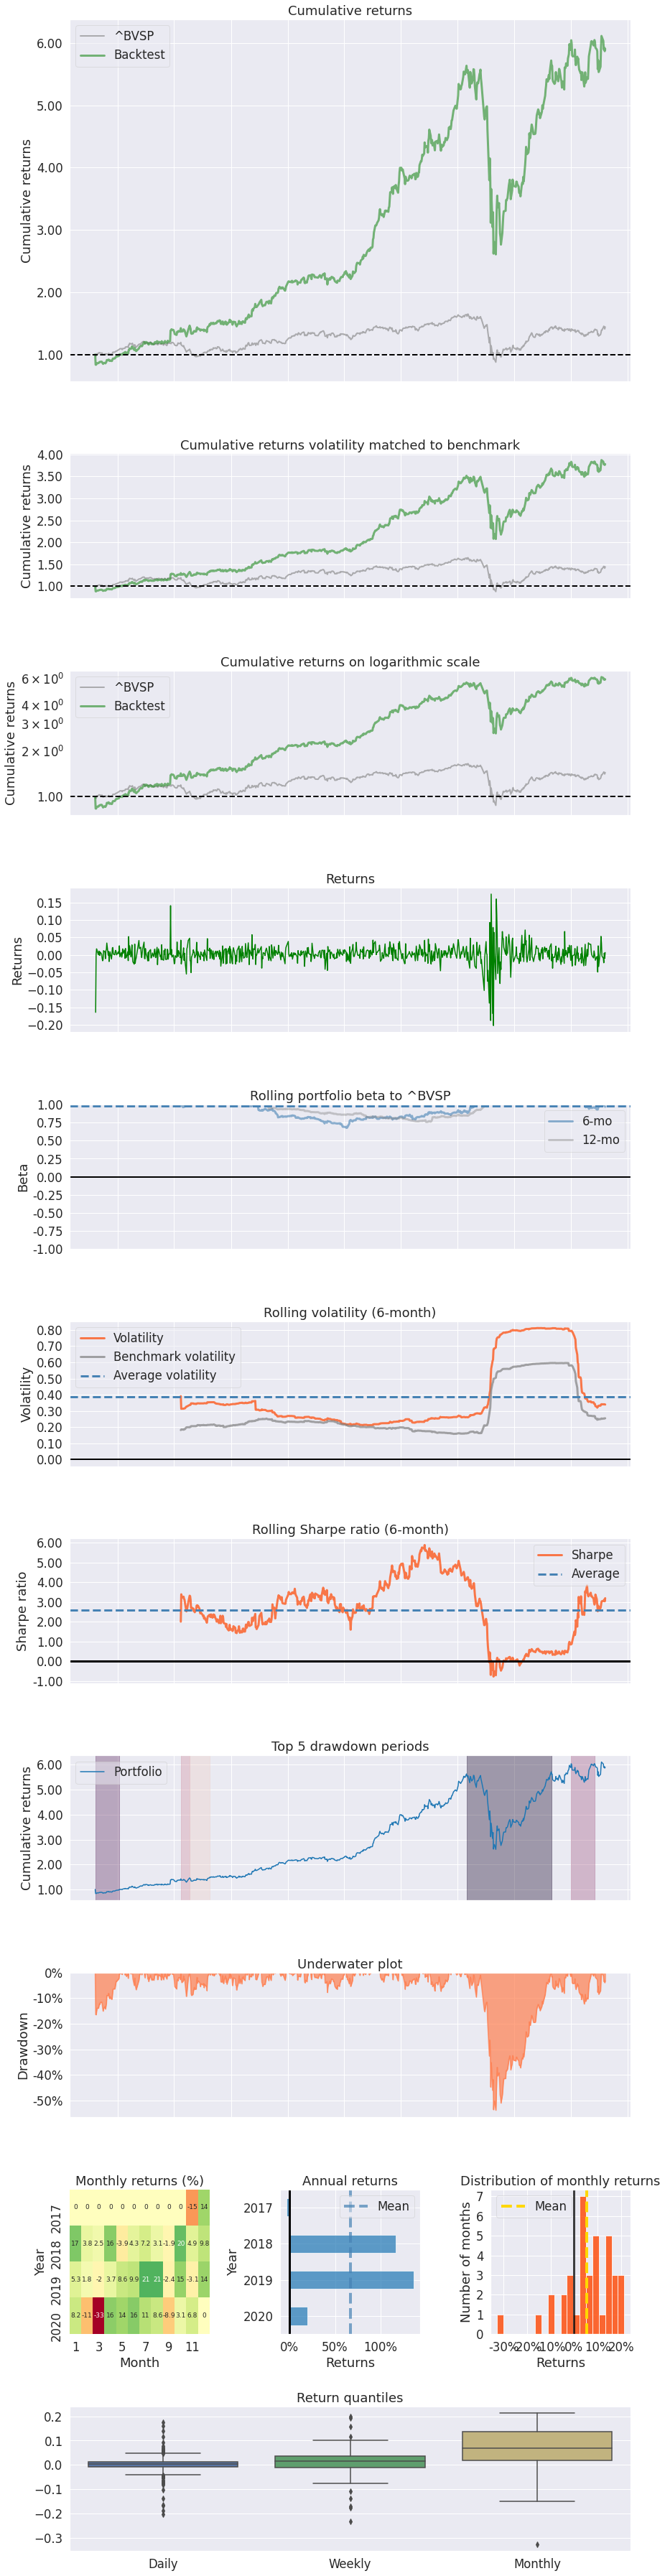

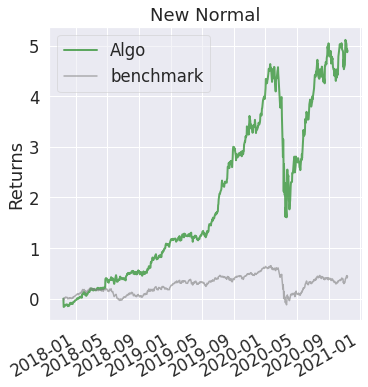

In [ ]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])


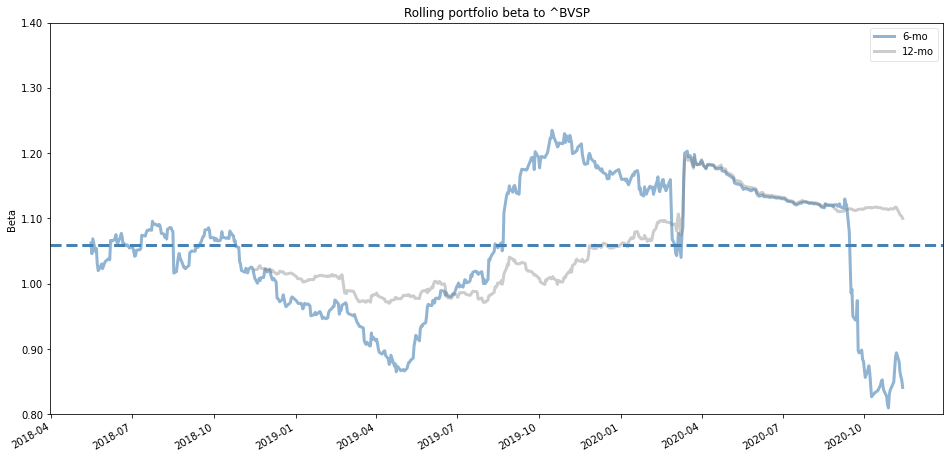

In [ ]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));